#  Project 1

## <span style="color:blue"> [ Digits Dataset Classification ]

### 1. 모듈 가져오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix #confusion_matrix

from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn import svm #SVM 
from sklearn.linear_model import SGDClassifier # SGD Classifier 
from sklearn.linear_model import LogisticRegression # Logistic Regression 


### 2.  Digits data  load
> * load_digits()함수로 digits data lode<br>digits data 1797행 64열 형식

In [2]:
from sklearn.datasets import load_digits

digits = load_digits() # digits dataset 불러오기
digits_data = digits.data 
print(digits_data.shape) # 데이터 개수 확인
print(digits.target.shape) # taget(=label) 데이터 개수 확인

(1797, 64)
(1797,)


### 3. Data Describe
> Digits data : 손글씨 숫자 인식하여 분류 (image data)
>>* Data total: 1797
>>* Feature : 64EA (pixel_0_0 ~ pixel_7_7)
>>* Label   : 10EA ([0,1,2,3,4,5,6,7,8,9])

In [3]:
# Feature data name 확인
digits.feature_names
print(digits.feature_names)

# Label data name 확인
digits_label = digits.target
digits.target_names
digits_label[:10]


['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

### 4. train, test dataset  split

In [4]:
# train, test 데이터 분리 
# test data size => 총 데이터의 20%
digitsX_train, digitsX_test, digitsY_train, digitsY_test = train_test_split(digits_data, 
                                                    digits_label, 
                                                    test_size=0.2, 
                                                    random_state=10)

### 5. 모델 학습(train) & 예측(test)
> 1. Decision Tree 

> 2. Random Forest 

> 3. SVM

> 4. SGD Classifier

> 5. Logistic Regression 


#### 5.1 Decision Tree 
> random_state =10일때 : 전체 정확도 0.85

              precision    recall  f1-score   support

           0       0.94      0.92      0.93        37
           1       0.91      0.91      0.91        34
           2       0.81      0.88      0.85        34
           3       0.79      0.85      0.82        40
           4       0.73      0.79      0.76        34
           5       0.91      0.91      0.91        32
           6       0.94      0.92      0.93        37
           7       0.95      0.88      0.91        40
           8       0.74      0.70      0.72        33
           9       0.81      0.77      0.79        39

    accuracy                           0.85       360
   macro avg       0.85      0.85      0.85       360
weighted avg       0.86      0.85      0.85       360

[[34  0  1  0  2  0  0  0  0  0]
 [ 0 31  2  0  0  0  0  0  1  0]
 [ 0  1 30  0  1  0  0  0  2  0]
 [ 1  0  0 34  1  0  0  0  1  3]
 [ 0  0  0  1 27  1  2  0  2  1]
 [ 0  0  0  2  0 29  0  0  1  0]
 [ 0  0  0  1  1  1 34  0  0  0]
 [ 0  0  1

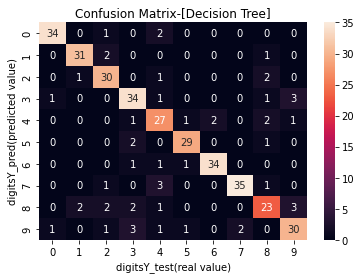

In [5]:
# 1. Decision Tree 

from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=10)
decision_tree.fit(digitsX_train,digitsY_train) # Decision Tree로 학습 
digitsY_pred = decision_tree.predict(digitsX_test) #Decision Tree 학습된 모델을 test data로 검증 

print(classification_report(digitsY_test, digitsY_pred))# 실제 label과 학습으로 예측된 label 결과 비교
print(confusion_matrix(digitsY_test, digitsY_pred))

fig = sns.heatmap(confusion_matrix(digitsY_test, digitsY_pred),annot=True,fmt='d') 
# annot : confusion_matrix 상에 각 케이스 숫자를 나타 낼지 여부 결정
#fmt : format으로 'd': decimal: 십진수 형태로 숫자 표기
plt.title('Confusion Matrix-[Decision Tree]')
plt.xlabel('digitsY_test(real value)')
plt.ylabel('digitsY_pred(predicted value)')
plt.show()

### 5.2 Random Forest 
> random_state =10일때 : 전체 정확도 0.97

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        37
           1       0.94      0.91      0.93        34
           2       0.97      1.00      0.99        34
           3       0.97      0.97      0.97        40
           4       0.97      0.94      0.96        34
           5       0.94      1.00      0.97        32
           6       1.00      1.00      1.00        37
           7       0.93      1.00      0.96        40
           8       0.94      0.91      0.92        33
           9       1.00      0.95      0.97        39

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360

[[36  0  0  0  1  0  0  0  0  0]
 [ 0 31  1  0  0  1  0  0  1  0]
 [ 0  0 34  0  0  0  0  0  0  0]
 [ 0  0  0 39  0  0  0  0  1  0]
 [ 0  0  0  0 32  0  0  2  0  0]
 [ 0  0  0  0  0 32  0  0  0  0]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0

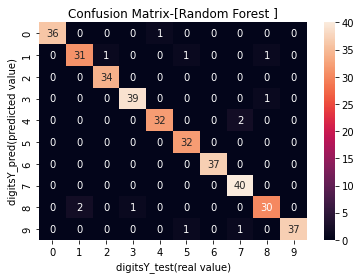

In [6]:
#Random Forest 

from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=10)
random_forest.fit(digitsX_train,digitsY_train)
digitsY_pred = random_forest.predict(digitsX_test)

print(classification_report(digitsY_test, digitsY_pred))
print(confusion_matrix(digitsY_test, digitsY_pred))
fig = sns.heatmap(confusion_matrix(digitsY_test,digitsY_pred),annot=True,fmt='d')
plt.title('Confusion Matrix-[Random Forest ]')
plt.xlabel('digitsY_test(real value)')
plt.ylabel('digitsY_pred(predicted value)')
plt.show()

### 5.3 SVM
> 전체 정확도 0.98

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.97      1.00      0.99        34
           2       0.97      1.00      0.99        34
           3       1.00      0.97      0.99        40
           4       1.00      0.94      0.97        34
           5       0.97      1.00      0.98        32
           6       1.00      1.00      1.00        37
           7       1.00      1.00      1.00        40
           8       0.91      0.97      0.94        33
           9       1.00      0.95      0.97        39

    accuracy                           0.98       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.98      0.98       360

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 34  0  0  0  0  0  0  0  0]
 [ 0  0 34  0  0  0  0  0  0  0]
 [ 0  0  1 39  0  0  0  0  0  0]
 [ 0  0  0  0 32  0  0  0  2  0]
 [ 0  0  0  0  0 32  0  0  0  0]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0

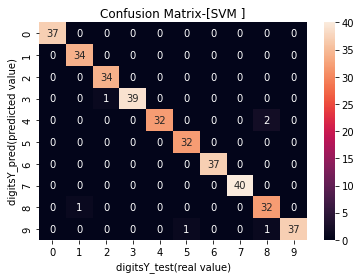

In [7]:
#SVM 
from sklearn import svm
svm_model = svm.SVC()

svm_model.fit(digitsX_train,digitsY_train)
digitsY_pred = svm_model.predict(digitsX_test)

print(classification_report(digitsY_test, digitsY_pred))
print(confusion_matrix(digitsY_test, digitsY_pred))
fig = sns.heatmap(confusion_matrix(digitsY_test, digitsY_pred),annot=True,fmt='d')
plt.title('Confusion Matrix-[SVM ]')
plt.xlabel('digitsY_test(real value)')
plt.ylabel('digitsY_pred(predicted value)')
plt.show()

### 5.4 SGD Classifier
> 전체 정확도 0.95

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        37
           1       0.82      0.94      0.88        34
           2       0.97      1.00      0.99        34
           3       1.00      0.97      0.99        40
           4       0.91      0.88      0.90        34
           5       0.97      0.94      0.95        32
           6       1.00      1.00      1.00        37
           7       1.00      0.97      0.99        40
           8       0.86      0.91      0.88        33
           9       1.00      0.90      0.95        39

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360

[[36  0  0  0  1  0  0  0  0  0]
 [ 0 32  0  0  1  0  0  0  1  0]
 [ 0  0 34  0  0  0  0  0  0  0]
 [ 0  0  1 39  0  0  0  0  0  0]
 [ 1  2  0  0 30  0  0  0  1  0]
 [ 0  2  0  0  0 30  0  0  0  0]
 [ 0  0  0  0  0  0 37  0  0  0]
 [ 0  0  0

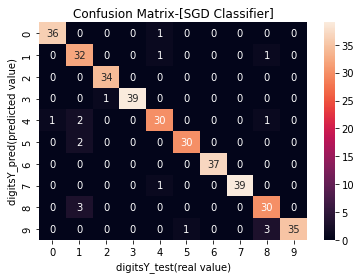

In [8]:
# SGD Classifier 
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()

sgd_model.fit(digitsX_train,digitsY_train)
digitsY_pred = sgd_model.predict(digitsX_test)

print(classification_report(digitsY_test, digitsY_pred))
print(confusion_matrix(digitsY_test, digitsY_pred))
fig = sns.heatmap(confusion_matrix(digitsY_test, digitsY_pred),annot=True,fmt='d')
plt.title('Confusion Matrix-[SGD Classifier]')
plt.xlabel('digitsY_test(real value)')
plt.ylabel('digitsY_pred(predicted value)')
plt.show()

### 5.5 Logistic Regression 
> 전체 정확도 0.95

#### <span style="color:blue">[경고]
* ConvergenceWarning: lbfgs failed to converge (status=1): STOP: TOTAL NO. of ITERATIONS REACHED LIMIT. 

#### <span style="color:blue">[해결법] 
* 반복 횟수의 max_iter을 크게 설정 
> <span style="color:red">(참고자료) https://aideepml.tistory.com/32

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.91      0.91      0.91        34
           2       0.92      1.00      0.96        34
           3       0.97      0.95      0.96        40
           4       0.94      0.94      0.94        34
           5       0.94      0.94      0.94        32
           6       0.97      0.97      0.97        37
           7       0.97      0.95      0.96        40
           8       0.89      0.94      0.91        33
           9       1.00      0.92      0.96        39

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360

[[37  0  0  0  0  0  0  0  0  0]
 [ 0 31  1  0  1  0  0  0  1  0]
 [ 0  0 34  0  0  0  0  0  0  0]
 [ 0  0  1 38  0  1  0  0  0  0]
 [ 0  1  0  0 32  0  0  0  1  0]
 [ 0  1  0  0  0 30  0  1  0  0]
 [ 0  1  0  0  0  0 36  0  0  0]
 [ 0  0  0

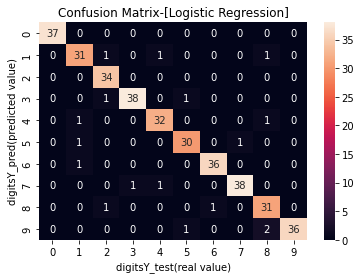

In [9]:
# Logistic Regression  
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter = 3000)

logistic_model.fit(digitsX_train,digitsY_train)
digitsY_pred = logistic_model.predict(digitsX_test)

print(classification_report(digitsY_test, digitsY_pred))
print(confusion_matrix(digitsY_test, digitsY_pred))
fig = sns.heatmap(confusion_matrix(digitsY_test, digitsY_pred),annot=True,fmt='d')
plt.title('Confusion Matrix-[Logistic Regression]')
plt.xlabel('digitsY_test(real value)')
plt.ylabel('digitsY_pred(predicted value)')
plt.show()

### 6. confusion matrix

#### * 성능지표
<img src =https://d3s0tskafalll9.cloudfront.net/media/images/E-2-3.max-800x600_mMmzi4T.jpg>

> Precision (정밀도) :   $Precision =$$TP \over TP+FP$

> Recall (재현율, 감도) : $ Recall =$$ TP \over TP+FN$

> Accuracy (정확도) : $ Accuracy =$$ TP+TN \over TP+TN+FP+FN$

> F1 score (Recall과 Precision의 조화평균):  
  $$ F1score ={2 \times} \frac {Precision \times Recall} {Precision + Recall}$$

#### *  Digits결론(회고)
*  Digits data의 경우 손으로 쓴 숫자가 무엇인지 맞추는 것이 관건이므로 데이터 불균형이 존재하지 않음 

> Dataset - balaned data 일때:
>> Accuracy(정확도) 높은 **SVM** 선정

> 만약 Dataset - imlbalaned data 일때:
>> F1score가 높은 **SVM** 선정

> 보충하고싶은점 :
>> 여러개의 학습 모델 ROC 그래프로 나타내어 최적의 모델 선정

--- 

#  Project 2

## <span style="color:blue"> [ Wine Dataset Classification ]

### 1. 모듈 가져오기

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix #confusion_matrix

from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn import svm #SVM 
from sklearn.linear_model import SGDClassifier # SGD Classifier 
from sklearn.linear_model import LogisticRegression # Logistic Regression 


### 2.  Digits data  load
> * load_wine()함수로 wine data lode<br>wine data 178행 13열 형식

In [11]:
from sklearn.datasets import load_wine

wine = load_wine() # wine dataset 불러오기
wine_data = wine.data 
print(wine_data.shape) # 데이터 개수 확인
print(wine.target.shape) # taget(=label) 데이터 개수 확인

(178, 13)
(178,)


### 3. Data Describe
> Digits data : 와인 등급 분류
>>* Data total: 178
>>* Feature : 13EA ('alcohol','malic_acid'....)
>>* Label   : 3EA ('class_0', 'class_1', 'class_2')

In [12]:
# Feature data name 확인
wine.feature_names
print(wine.feature_names)

# Label data name 확인
wine_label = wine.target
wine.target_names

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


array(['class_0', 'class_1', 'class_2'], dtype='<U7')

### 4. train, test dataset  split

In [13]:
# train, test 데이터 분리 
# test data size => 총 데이터의 30%
wineX_train, wineX_test, wineY_train, wineY_test = train_test_split(wine_data, 
                                                    wine_label, 
                                                    test_size=0.3, 
                                                    random_state=20)

### 5. 모델 학습(train) & 예측(test)
> 1. Decision Tree 

> 2. Random Forest 

> 3. SVM

> 4. SGD Classifier

> 5. Logistic Regression 


#### 5.1 Decision Tree 
> random_state =20일때 : 전체 정확도 0.96

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       0.96      0.96      0.96        27
           2       1.00      1.00      1.00        12

    accuracy                           0.96        54
   macro avg       0.97      0.97      0.97        54
weighted avg       0.96      0.96      0.96        54

[[14  1  0]
 [ 1 26  0]
 [ 0  0 12]]


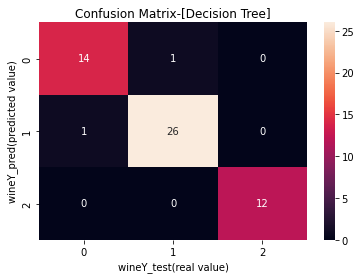

In [14]:
# 1. Decision Tree 

from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=20)
decision_tree.fit(wineX_train,wineY_train) # Decision Tree로 학습 
wineY_pred = decision_tree.predict(wineX_test) #Decision Tree 학습된 모델을 test data로 검증 

print(classification_report(wineY_test,wineY_pred))# 실제 label과 학습으로 예측된 label 결과 비교
print(confusion_matrix(wineY_test, wineY_pred))

fig = sns.heatmap(confusion_matrix(wineY_test, wineY_pred),annot=True,fmt='d') 
# annot : confusion_matrix 상에 각 케이스 숫자를 나타 낼지 여부 결정
#fmt : format으로 'd': decimal: 십진수 형태로 숫자 표기
plt.title('Confusion Matrix-[Decision Tree]')
plt.xlabel('wineY_test(real value)')
plt.ylabel('wineY_pred(predicted value)')
plt.show()

### 5.2 Random Forest 
> random_state =20일때 : 전체 정확도 100

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        12

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

[[15  0  0]
 [ 0 27  0]
 [ 0  0 12]]


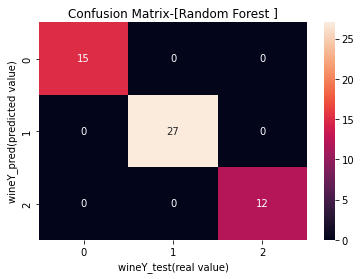

In [15]:
#Random Forest 

from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=20)
random_forest.fit(wineX_train,wineY_train)
wineY_pred = random_forest.predict(wineX_test)

print(classification_report(wineY_test, wineY_pred))
print(confusion_matrix(wineY_test, wineY_pred))
fig = sns.heatmap(confusion_matrix(wineY_test, wineY_pred),annot=True,fmt='d')
plt.title('Confusion Matrix-[Random Forest ]')
plt.xlabel('wineY_test(real value)')
plt.ylabel('wineY_pred(predicted value)')
plt.show()

### 5.3 SVM
> 전체 정확도 0.70

              precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       0.78      0.67      0.72        27
           2       0.39      0.58      0.47        12

    accuracy                           0.70        54
   macro avg       0.72      0.71      0.71        54
weighted avg       0.76      0.70      0.72        54

[[13  0  2]
 [ 0 18  9]
 [ 0  5  7]]


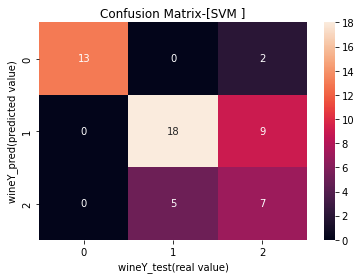

In [16]:
#SVM 
from sklearn import svm
svm_model = svm.SVC()

svm_model.fit(wineX_train,wineY_train)
wineY_pred = svm_model.predict(wineX_test)

print(classification_report(wineY_test, wineY_pred))
print(confusion_matrix(wineY_test, wineY_pred))
fig = sns.heatmap(confusion_matrix(wineY_test, wineY_pred),annot=True,fmt='d')
plt.title('Confusion Matrix-[SVM ]')
plt.xlabel('wineY_test(real value)')
plt.ylabel('wineY_pred(predicted value)')
plt.show()

### 5.4 SGD Classifier
> 전체 정확도 0.48

              precision    recall  f1-score   support

           0       0.64      0.93      0.76        15
           1       1.00      0.11      0.20        27
           2       0.31      0.75      0.44        12

    accuracy                           0.48        54
   macro avg       0.65      0.60      0.47        54
weighted avg       0.75      0.48      0.41        54

[[14  0  1]
 [ 5  3 19]
 [ 3  0  9]]


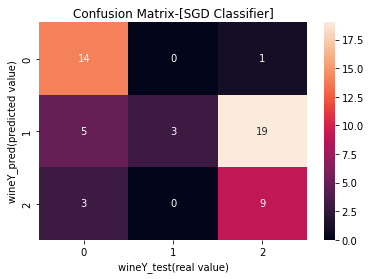

In [17]:
# SGD Classifier 
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()

sgd_model.fit(wineX_train,wineY_train)
wineY_pred = sgd_model.predict(wineX_test)

print(classification_report(wineY_test, wineY_pred))
print(confusion_matrix(wineY_test, wineY_pred))
fig = sns.heatmap(confusion_matrix(wineY_test, wineY_pred),annot=True,fmt='d')
plt.title('Confusion Matrix-[SGD Classifier]')
plt.xlabel('wineY_test(real value)')
plt.ylabel('wineY_pred(predicted value)')
plt.show()

### 5.5 Logistic Regression 
> 전체 정확도 100

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        27
           2       1.00      1.00      1.00        12

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

[[15  0  0]
 [ 0 27  0]
 [ 0  0 12]]


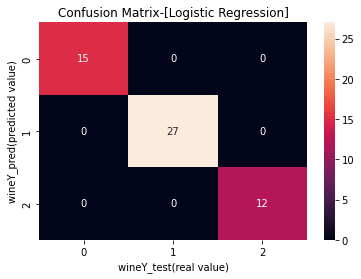

In [18]:
# Logistic Regression  
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter = 3000)

logistic_model.fit(wineX_train,wineY_train)
wineY_pred = logistic_model.predict(wineX_test)

print(classification_report(wineY_test, wineY_pred))
print(confusion_matrix(wineY_test, wineY_pred))
fig = sns.heatmap(confusion_matrix(wineY_test,wineY_pred),annot=True,fmt='d')
plt.title('Confusion Matrix-[Logistic Regression]')
plt.xlabel('wineY_test(real value)')
plt.ylabel('wineY_pred(predicted value)')
plt.show()

### 6. confusion matrix

#### * 성능지표
<img src =https://d3s0tskafalll9.cloudfront.net/media/images/E-2-3.max-800x600_mMmzi4T.jpg>

> Precision (정밀도) :   $Precision =$$TP \over TP+FP$

> Recall (재현율, 감도) : $ Recall =$$ TP \over TP+FN$

> Accuracy (정확도) : $ Accuracy =$$ TP+TN \over TP+TN+FP+FN$

> F1 score (Recall과 Precision의 조화평균):  
  $$ F1score ={2 \times} \frac {Precision \times Recall} {Precision + Recall}$$

## <span style="color:blue"> Random Forest 및 Logistic Regression 재분석

In [19]:
# train, test 데이터 분리 
# test data size => 총 데이터의 30%
# random_state =15
wineX_train, wineX_test, wineY_train, wineY_test = train_test_split(wine_data, 
                                                    wine_label, 
                                                    test_size=0.3, 
                                                    random_state=15)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      1.00      1.00        19
           2       1.00      1.00      1.00        17

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54

[[18  0  0]
 [ 0 19  0]
 [ 0  0 17]]


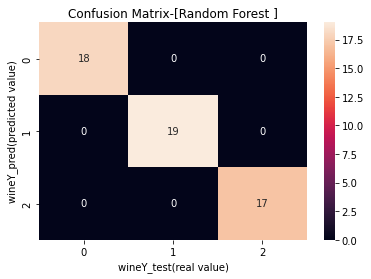

In [20]:
#Random Forest 

from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=15)
random_forest.fit(wineX_train,wineY_train)
wineY_pred = random_forest.predict(wineX_test)

print(classification_report(wineY_test, wineY_pred))
print(confusion_matrix(wineY_test, wineY_pred))
fig = sns.heatmap(confusion_matrix(wineY_test, wineY_pred),annot=True,fmt='d')
plt.title('Confusion Matrix-[Random Forest ]')
plt.xlabel('wineY_test(real value)')
plt.ylabel('wineY_pred(predicted value)')
plt.show()

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        18
           1       0.90      1.00      0.95        19
           2       1.00      0.94      0.97        17

    accuracy                           0.96        54
   macro avg       0.97      0.96      0.96        54
weighted avg       0.97      0.96      0.96        54

[[17  1  0]
 [ 0 19  0]
 [ 0  1 16]]


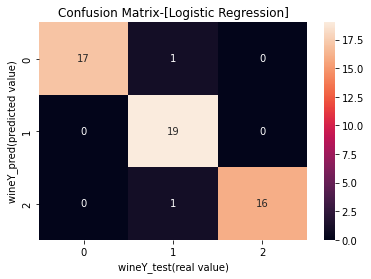

In [21]:
# Logistic Regression  
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter = 3000)

logistic_model.fit(wineX_train,wineY_train)
wineY_pred = logistic_model.predict(wineX_test)

print(classification_report(wineY_test, wineY_pred))
print(confusion_matrix(wineY_test, wineY_pred))
fig = sns.heatmap(confusion_matrix(wineY_test,wineY_pred),annot=True,fmt='d')
plt.title('Confusion Matrix-[Logistic Regression]')
plt.xlabel('wineY_test(real value)')
plt.ylabel('wineY_pred(predicted value)')
plt.show()

#### *  Wine 결론(회고)
*  wine data는 등급 분류라서 data 불균형이 있을 수 있기 때문에 정확도를 보는 것 보다 F1score를 통해 모델 성능평가를 하는 것이 맞음

> 만약 Dataset - balaned data 일때:
>> Accuracy(정확도) 높은 **Random Forest** 선정

> 만약 Dataset - imlbalaned data 일때:
>> F1score가 높은 **Random Forest** 선정

> 보충하고싶은점 :
>> 여러개의 학습 모델 ROC 그래프로 나타내어 최적의 모델 선정

> 회고 : 
>> train,test split할때 random_state =20 일때  Random Forest와 Logistic Regression의 성능평가가 1.0으로 동일시하게 나와서 random_state를 다르게 설정한 데이터에도 동일한 결과치를 보이는 확인하기 위해 두가지만 재분석을 실시한 결과 **동일 하지 않음**

>> 분석시 1이라는 수가 나와서 나올 수 있는지 의문이 들긴하지만 현재 random_state =15와 20으로 주어졌을 때에도 동일한 결과치를 낸것으로 보아 와인 등급 분류는  Random Forest 학습모델이 적절하다는 것으로 판단함.

---

#  Project 3

## <span style="color:blue">[Breast_cancer_Dataset Classification]

### 1. 모듈 가져오기

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix #confusion_matrix

from sklearn.tree import DecisionTreeClassifier #Decision Tree
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn import svm #SVM 
from sklearn.linear_model import SGDClassifier # SGD Classifier 
from sklearn.linear_model import LogisticRegression # Logistic Regression 


### 2.  Digits data  load
> * load_breast_cancer()함수로 breast_cancer data lode<br>breast_cancer data 569행 30열 형식

In [26]:
from sklearn.datasets import load_breast_cancer

breast_cancer = load_breast_cancer() # breast_cancer dataset 불러오기
breast_cancer_data = breast_cancer.data 
print(breast_cancer_data.shape) # 데이터 개수 확인
print(breast_cancer.target.shape) # taget(=label) 데이터 개수 확인

(569, 30)
(569,)


### 3. Data Describe
> Digits data : 유방암 여부 판단 (양성인지 음성인지)
>>* Data total: 569
>>* Feature : 30EA (mean radius', 'mean texture'....)
>>* Label   : 2EA ('malignant', 'benign')

In [28]:
# Feature data name 확인
breast_cancer.feature_names
print(breast_cancer.feature_names)

# Label data name 확인
breast_cancer_label = breast_cancer.target
breast_cancer.target_names

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


array(['malignant', 'benign'], dtype='<U9')

### 4. train, test dataset  split

In [29]:
# train, test 데이터 분리 
# test data size => 총 데이터의 20%
breast_cancerX_train, breast_cancerX_test, breast_cancerY_train, breast_cancerY_test = train_test_split(breast_cancer_data, 
                                                                                        breast_cancer_label, 
                                                                                        test_size=0.2, 
                                                                                        random_state=30)

### 5. 모델 학습(train) & 예측(test)
> 1. Decision Tree 

> 2. Random Forest 

> 3. SVM

> 4. SGD Classifier

> 5. Logistic Regression 


#### 5.1 Decision Tree 
> random_state =30일때 : 전체 정확도 0.93

              precision    recall  f1-score   support

           0       0.93      0.89      0.91        44
           1       0.93      0.96      0.94        70

    accuracy                           0.93       114
   macro avg       0.93      0.92      0.93       114
weighted avg       0.93      0.93      0.93       114

[[39  5]
 [ 3 67]]


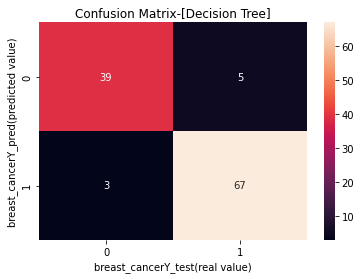

In [33]:
# 1. Decision Tree 

from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=30)
decision_tree.fit(breast_cancerX_train,breast_cancerY_train) # Decision Tree로 학습 
breast_cancerY_pred = decision_tree.predict(breast_cancerX_test) #Decision Tree 학습된 모델을 test data로 검증 

print(classification_report(breast_cancerY_test, breast_cancerY_pred))# 실제 label과 학습으로 예측된 label 결과 비교
print(confusion_matrix(breast_cancerY_test, breast_cancerY_pred))

fig = sns.heatmap(confusion_matrix(breast_cancerY_test, breast_cancerY_pred),annot=True,fmt='d') 
# annot : confusion_matrix 상에 각 케이스 숫자를 나타 낼지 여부 결정
#fmt : format으로 'd': decimal: 십진수 형태로 숫자 표기
plt.title('Confusion Matrix-[Decision Tree]')
plt.xlabel('breast_cancerY_test(real value)')
plt.ylabel('breast_cancerY_pred(predicted value)')
plt.show()

### 5.2 Random Forest 
> random_state =30일때 : 전체 정확도 0.95

              precision    recall  f1-score   support

           0       0.97      0.89      0.93        44
           1       0.93      0.99      0.96        70

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114

[[39  5]
 [ 1 69]]


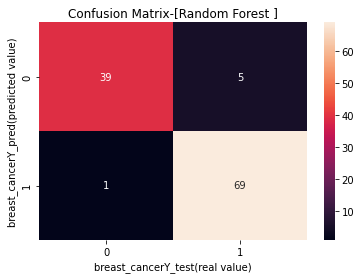

In [34]:
#Random Forest 

from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=30)
random_forest.fit(breast_cancerX_train,breast_cancerY_train)
breast_cancerY_pred = random_forest.predict(breast_cancerX_test)

print(classification_report(breast_cancerY_test, breast_cancerY_pred))
print(confusion_matrix(breast_cancerY_test, breast_cancerY_pred))
fig = sns.heatmap(confusion_matrix(breast_cancerY_test, breast_cancerY_pred),annot=True,fmt='d')
plt.title('Confusion Matrix-[Random Forest ]')
plt.xlabel('breast_cancerY_test(real value)')
plt.ylabel('breast_cancerY_pred(predicted value)')
plt.show()

### 5.3 SVM
> 전체 정확도 0.90

              precision    recall  f1-score   support

           0       0.97      0.77      0.86        44
           1       0.87      0.99      0.93        70

    accuracy                           0.90       114
   macro avg       0.92      0.88      0.89       114
weighted avg       0.91      0.90      0.90       114

[[34 10]
 [ 1 69]]


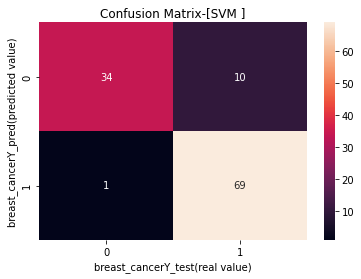

In [35]:
#SVM 
from sklearn import svm
svm_model = svm.SVC()

svm_model.fit(breast_cancerX_train,breast_cancerY_train)
breast_cancerY_pred = svm_model.predict(breast_cancerX_test)

print(classification_report(breast_cancerY_test, breast_cancerY_pred))
print(confusion_matrix(breast_cancerY_test, breast_cancerY_pred))
fig = sns.heatmap(confusion_matrix(breast_cancerY_test, breast_cancerY_pred),annot=True,fmt='d')
plt.title('Confusion Matrix-[SVM ]')
plt.xlabel('breast_cancerY_test(real value)')
plt.ylabel('breast_cancerY_pred(predicted value)')
plt.show()

### 5.4 SGD Classifier
> 전체 정확도 0.59

              precision    recall  f1-score   support

           0       0.48      1.00      0.65        44
           1       1.00      0.33      0.49        70

    accuracy                           0.59       114
   macro avg       0.74      0.66      0.57       114
weighted avg       0.80      0.59      0.56       114

[[44  0]
 [47 23]]


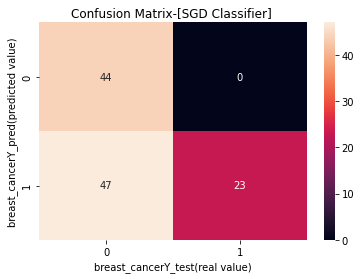

In [36]:
# SGD Classifier 
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()

sgd_model.fit(breast_cancerX_train,breast_cancerY_train)
breast_cancerY_pred = sgd_model.predict(breast_cancerX_test)

print(classification_report(breast_cancerY_test, breast_cancerY_pred))
print(confusion_matrix(breast_cancerY_test, breast_cancerY_pred))
fig = sns.heatmap(confusion_matrix(breast_cancerY_test, breast_cancerY_pred),annot=True,fmt='d')
plt.title('Confusion Matrix-[SGD Classifier] ')
plt.xlabel('breast_cancerY_test(real value)')
plt.ylabel('breast_cancerY_pred(predicted value)')
plt.show()

### 5.5 Logistic Regression 
> 전체 정확도 0.89

              precision    recall  f1-score   support

           0       0.88      0.84      0.86        44
           1       0.90      0.93      0.92        70

    accuracy                           0.89       114
   macro avg       0.89      0.88      0.89       114
weighted avg       0.89      0.89      0.89       114

[[37  7]
 [ 5 65]]


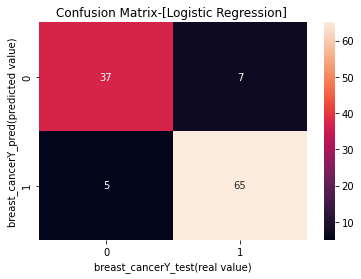

In [37]:
# Logistic Regression  
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter = 3000)

logistic_model.fit(breast_cancerX_train,breast_cancerY_train)
breast_cancerY_pred = logistic_model.predict(breast_cancerX_test)

print(classification_report(breast_cancerY_test, breast_cancerY_pred))
print(confusion_matrix(breast_cancerY_test, breast_cancerY_pred))
fig = sns.heatmap(confusion_matrix(breast_cancerY_test, breast_cancerY_pred),annot=True,fmt='d')
plt.title('Confusion Matrix-[Logistic Regression] ')
plt.xlabel('breast_cancerY_test(real value)')
plt.ylabel('breast_cancerY_pred(predicted value)')
plt.show()

### 6. confusion matrix

#### * 성능지표
<img src =https://d3s0tskafalll9.cloudfront.net/media/images/E-2-3.max-800x600_mMmzi4T.jpg>

> Precision (정밀도) :   $Precision =$$TP \over TP+FP$

> Recall (재현율, 감도) : $ Recall =$$ TP \over TP+FN$

> Accuracy (정확도) : $ Accuracy =$$ TP+TN \over TP+TN+FP+FN$

> F1 score (Recall과 Precision의 조화평균):  
  $$ F1score ={2 \times} \frac {Precision \times Recall} {Precision + Recall}$$

#### *  Breast_cancer결론(회고)
*  breast_cancer data는 양성인지 음성인지 정확히 분류해야하는 문제이기 때문에 F1score 대비 정확도가 중요하다고 판단

> 만약 Dataset - balaned data 일때:
>> Accuracy(정확도) 높은 **Random Forest** 선정

> 만약 Dataset - imlbalaned data 일때:
>> F1score가 높은 **Random Forest** 선정

> 보충하고싶은점 :
>> 여러개의 학습 모델 ROC 그래프로 나타내어 최적의 모델 선정

---

## 전체 회고
* confusion_matrix와 히트맵이 상당히 닮아 있어 히트맵으로 시각화 함  (-feat : 황무성 퍼실님)
* confusion_matrix  히트맵으로 이해 및 계산법 <br> (참고자료)https://nittaku.tistory.com/295
* 아직 배우는 단계라서 표현하지 못했지만, 5가지 학습모델들을 ROC 그래프로 나타내어 자체 성능평가를 진행할 수 있는 기틀을 만들고 싶다는 생각이 들었음.
* Data set 특성에 따라 학습모델이 어느정도 결정되는 느낌이 들었음. 
* 로지스틱 회귀 모델을 구현하는 도중 경고 오류가 눈에 밟혀 보이지 않게 해결함 ( 반복학습 횟수가 작아 나는 오류였고 반복횟수를 높게 올렸음 1000,2000 했을 때에도 계속 경고문이 나왔고 3000했을때 안나옴, 이 부분은 약간의 범위 노가다가 필요한것 같음)
* 위의 경고문 원인 및 해결법은 참고 자료 첨부함. 
* 아직 미숙해서 성능 평가시 시간이 많이 걸렸지만 그만큼 보람있는 프로젝트임

---